<a href="https://colab.research.google.com/github/Mr-RAKSHIT-2004-GUPTA/ML-paractice/blob/main/boston_multicollinearity_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_housing = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
df_bmi = pd.read_csv("bmi.csv")

In [ ]:
df_bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df_bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df_bmi['Gender'] = df_bmi['Gender'].map({'Male':0 , 'Female' :1})

In [ ]:
df_bmi['Gender'] = df_bmi['Gender'].astype(int)

In [ ]:
#correlation matrix bmi
corr = df_bmi.corr()


<Axes: >

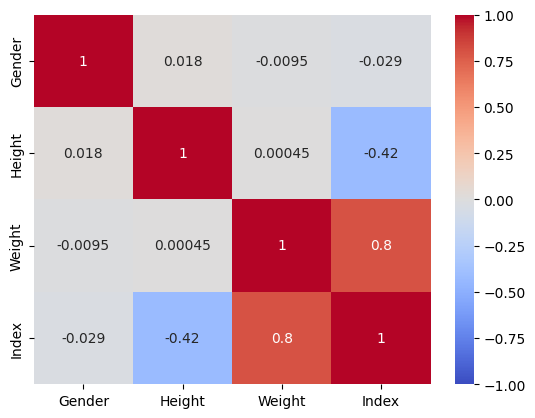

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm',vmax=1 , vmin = -1)

<Axes: >

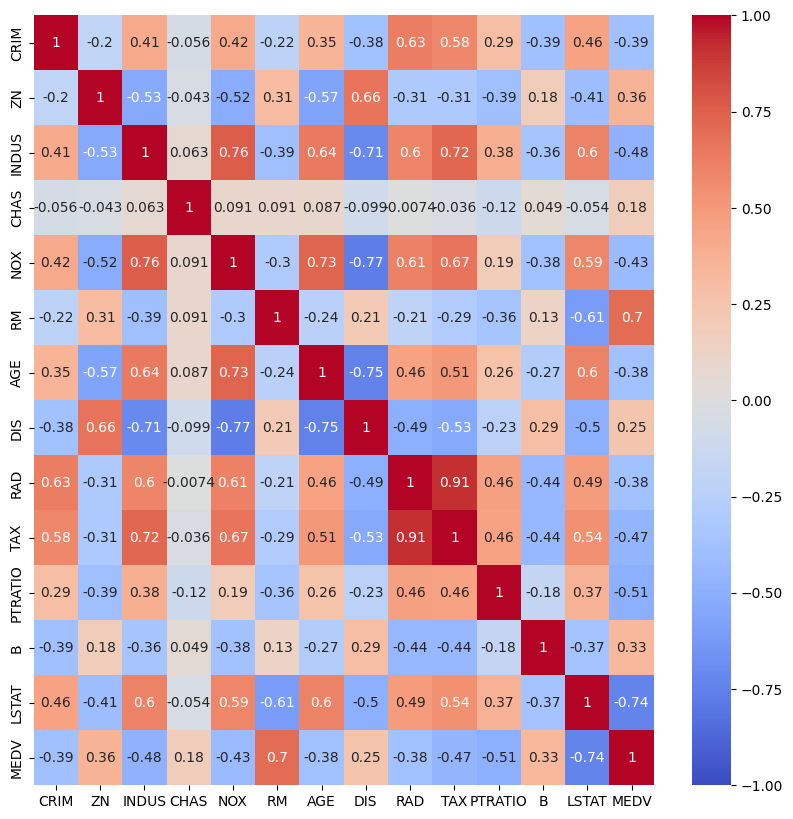

In [ ]:
corr = df_housing.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True , vmax = 1 , vmin = -1 , cmap = 'coolwarm')


# ***CLUSTER MAP***

---




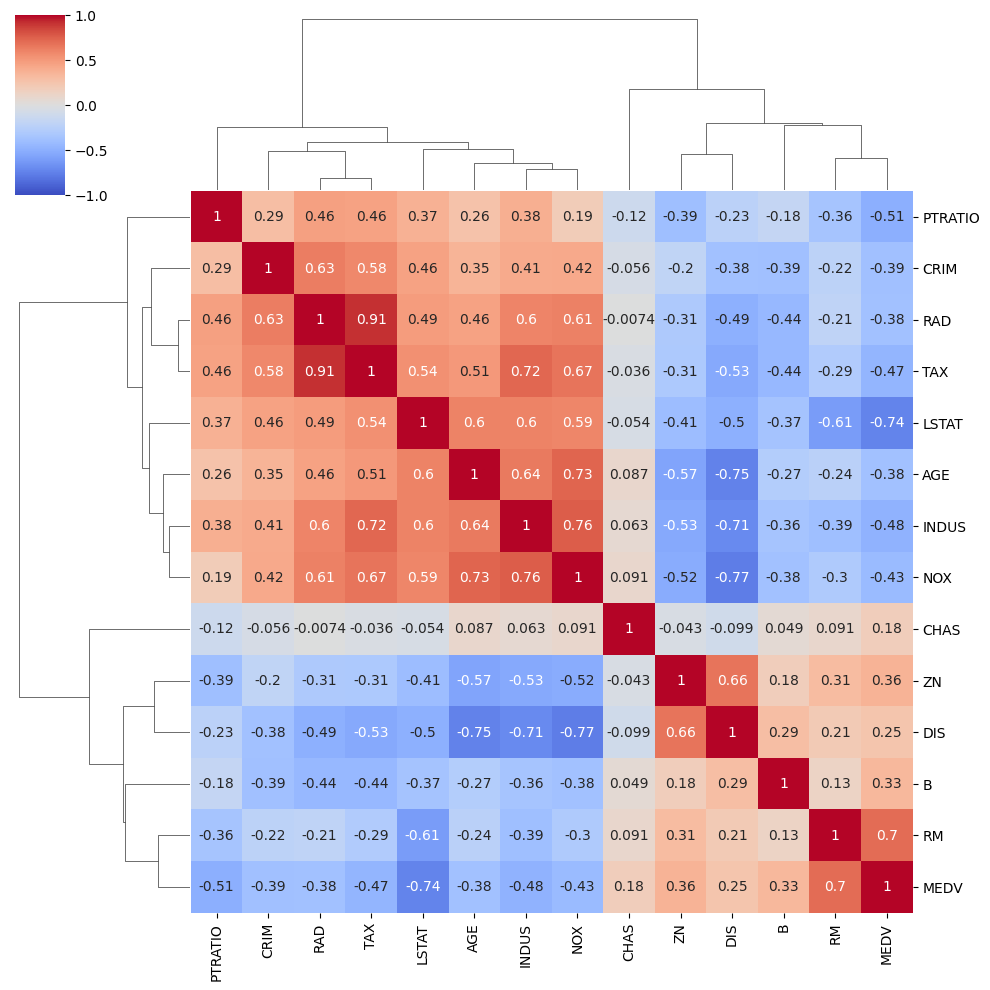

In [ ]:
sns.clustermap(df_housing.corr() , vmax = 1 , vmin = -1 , cmap = 'coolwarm' , annot = True)

# ***VARIANCE INFLATION FACTOR(vif)***

---



---



In [ ]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['features'] = df_bmi.columns
vif['vif_value'] = [variance_inflation_factor(df_bmi.values , i) for i in range(len(df_bmi.columns))]

In [ ]:
vif

,features,vif_value
0,Gender,2.031010
1,Height,11.941301
2,Weight,40.024880
3,Index,25.143752


In [ ]:
vif = pd.DataFrame()
vif['features'] = df_housing.columns
vif['vif_value'] = [variance_inflation_factor(df_housing.values , i) for i in range(len(df_housing.columns))]

In [ ]:
vif

,features,vif_value
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


DROPING THE HIGH VIF ONE BY ONE

In [ ]:
# droping rm
X = df_housing.copy()


In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
X.drop('RM' , inplace = True , axis = 1)

In [ ]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif_value'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]

In [ ]:
vif

,features,vif_value
0,CRIM,2.110287
1,ZN,2.889159
2,INDUS,14.202832
3,CHAS,1.174535
4,NOX,62.073615
5,AGE,20.752654
6,DIS,14.258330
7,RAD,15.134503
8,TAX,61.603579
9,PTRATIO,69.068505


In [ ]:
X.drop('PTRATIO' , axis = 1 , inplace = True)

In [ ]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif_value'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]

In [ ]:
vif

,features,vif_value
0,CRIM,2.104099
1,ZN,2.558330
2,INDUS,14.147928
3,CHAS,1.162582
4,NOX,59.247225
5,AGE,20.427509
6,DIS,9.639018
7,RAD,15.130157
8,TAX,58.759509
9,B,19.222365


In [ ]:
X.drop('NOX',axis= 1 , inplace = True)

In [ ]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif_value'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]

In [ ]:
vif

,features,vif_value
0,CRIM,2.103346
1,ZN,2.548017
2,INDUS,13.152242
3,CHAS,1.161474
4,AGE,17.056895
5,DIS,9.446150
6,RAD,15.049247
7,TAX,54.753156
8,B,18.593595
9,LSTAT,11.031436


In [ ]:
X.drop('TAX' , axis = 1 , inplace = True)

In [ ]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif_value'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]

In [ ]:
vif

,features,vif_value
0,CRIM,2.103261
1,ZN,2.465535
2,INDUS,9.024818
3,CHAS,1.142745
4,AGE,16.449470
5,DIS,8.722321
6,RAD,4.858231
7,B,18.131319
8,LSTAT,10.934458
9,MEDV,11.385287


In [ ]:
X.drop('AGE',inplace = True , axis = 1)

In [ ]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif_value'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
vif

,features,vif_value
0,CRIM,2.101161
1,ZN,2.391106
2,INDUS,8.393235
3,CHAS,1.141912
4,DIS,8.296466
5,RAD,4.835543
6,B,17.339610
7,LSTAT,7.872398
8,MEDV,9.690443


In [ ]:
X.drop('B',inplace = True , axis = 1)

In [ ]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif_value'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
vif

,features,vif_value
0,CRIM,2.095110
1,ZN,2.317242
2,INDUS,8.044685
3,CHAS,1.141690
4,DIS,6.395977
5,RAD,4.727054
6,LSTAT,7.012987
7,MEDV,5.630097


# ***Regression Models Performance Comparision***

In [ ]:
scaled_housing = df_housing.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
scaler = StandardScaler()
scaler.fit(scaled_housing)

StandardScaler()

In [ ]:
scaled_housing = scaler.transform(scaled_housing)

In [ ]:
scaled_housing = pd.DataFrame(scaled_housing , columns = df_housing.columns)

In [ ]:
scaled_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [ ]:
X = scaled_housing.iloc[:,:-1]
y = scaled_housing.iloc[: , -1]

# ***REGRESSION EVALUATION METRICES***

---

https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies/notebook

# ***Linear Rigression***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#prediction
y_pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_lm = cross_val_score(estimator = model , X = X_train , y = y_train , cv = 10)

In [ ]:
cv_lm

array([0.78005109, 0.79231329, 0.75452641, 0.29904458, 0.78702938,
       0.72324517, 0.84606865, 0.66835141, 0.79974401, 0.5362705 ])

In [ ]:
r2 = r2_score(y_test , y_pred)

In [ ]:
r2

0.668759493535632

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

In [ ]:
lm_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [ ]:
lm_adjusted_r2

0.6198262368988503

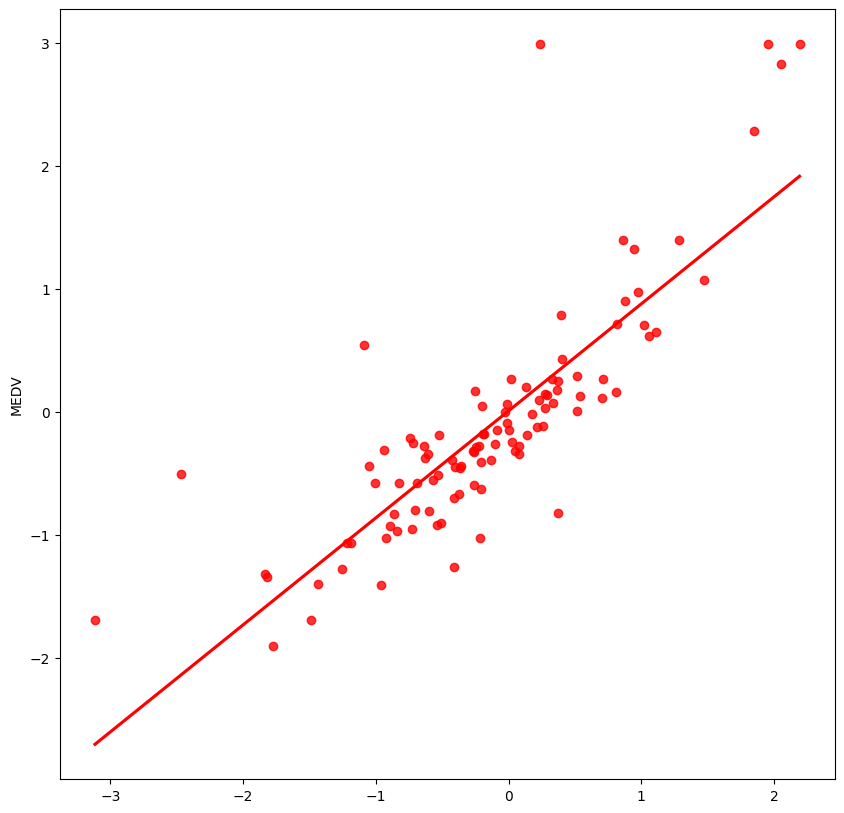

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x = y_pred, y = y_test, ci = None, color = 'red')
plt.show()

# ***Linear Regressin after droping features using VIF***

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


# ***RECURSIVE FEATURE ENGINEERING***

In [ ]:
X = scaled_housing.iloc[:,:-1]
y = scaled_housing.iloc[: , -1]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , random_state = 42)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline